<a href="https://colab.research.google.com/github/sbooeshaghi/colosseum/blob/master/analysis/varying_flowrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!date

Tue Jan 26 09:57:27 UTC 2021


In [ ]:
!git clone https://github.com/sbooeshaghi/colosseum.git

Cloning into 'colosseum'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 537 (delta 3), reused 12 (delta 2), pack-reused 524
Receiving objects: 100% (537/537), 11.56 MiB | 27.35 MiB/s, done.
Resolving deltas: 100% (284/284), done.


# Varying flowrate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick


plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv("/content/colosseum/data/experiment_1.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

columns = {"Tube Number": "tube_number",
           "Flow rate (uL/s)": "flowrate",
           "Before (g)":	"empty_weight",
           "After (g)": "total_weight",
           "Difference (g)":	"fluid_vol",
           "Percent error from 1 (%)": "error"}

df = df.rename(columns=columns)
df["expected_vol"] = 1.000

In [ ]:
df

,flowrate,tube_number,empty_weight,total_weight,fluid_vol,error,expected_vol
0,6.25,1,1.066,2.063,0.997,-0.3,1.0
1,6.25,2,1.068,2.027,0.959,-4.1,1.0
2,6.25,3,1.068,2.027,0.959,-4.1,1.0
3,6.25,4,1.068,2.079,1.011,1.1,1.0
4,6.25,5,1.068,2.053,0.985,-1.5,1.0
...,...,...,...,...,...,...,...
175,12.50,26,1.055,2.056,1.001,0.1,1.0
176,12.50,27,1.067,2.028,0.961,-3.9,1.0
177,12.50,28,1.066,2.059,0.993,-0.7,1.0
178,12.50,29,1.064,2.042,0.978,-2.2,1.0


In [ ]:
obs = df.groupby("flowrate")["fluid_vol"].apply(np.array)
exp = [1.000, 1.000, 1.000, 1.000, 1.000, 1.000]
conditions = np.unique(df["flowrate"].values)

In [ ]:
obs

flowrate
6.25      [0.997, 0.9590000000000001, 0.9590000000000001...
12.50     [0.996, 0.941, 1.004, 1.021, 0.97, 0.996, 1.02...
25.00     [0.9440000000000001, 0.9840000000000001, 0.954...
50.00     [0.973, 0.951, 0.941, 0.995, 0.965, 1.04, 1.06...
100.00    [0.978, 0.993, 0.9840000000000001, 1.004, 0.97...
200.00    [0.894, 0.961, 0.968, 0.966, 1.003, 1.013, 0.9...
Name: fluid_vol, dtype: object

In [ ]:
exp

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
mean = df.groupby("flowrate")["fluid_vol"].agg(np.mean)
stdev = df.groupby("flowrate")["fluid_vol"].agg(np.std)

In [ ]:
mean

flowrate
6.25      0.986633
12.50     0.987800
25.00     0.987567
50.00     0.993167
100.00    0.993967
200.00    0.995900
Name: fluid_vol, dtype: float64

In [ ]:
stdev

flowrate
6.25      0.019676
12.50     0.023817
25.00     0.022632
50.00     0.028836
100.00    0.023986
200.00    0.027037
Name: fluid_vol, dtype: float64

In [ ]:
def violinplot(data, ax, **kwd): 
    xticklabels = kwd.get("xticklabels", [])
    xticks = kwd.get("xticks", [])
    selected = kwd.get("selected", None)
    color = kwd.get("color", "lightgrey")
    
    if  len(xticks)==0: xticks = np.arange(len(data))+1;
    if  len(xticklabels)==0: xticklabels = np.arange(len(data))+1;
    assert(len(xticks) == len(xticklabels))
        
    violins = ax.violinplot(data, positions=xticks, showmeans=False, showmedians=False, showextrema=False)
    
    for vidx, v in enumerate(violins['bodies']):
        v.set_facecolor(color)
        v.set_edgecolor('black')
        v.set_alpha(1)
        if selected == vidx:
            v.set_facecolor("#D43F3A")

            
    
    for didx, d in enumerate(data):
        x = xticks[didx]
        xx = np.random.normal(x, 0.04, size=len(d))
        
        # actual points
        ax.scatter(xx, d, s = 5, color="white", edgecolor="black", linewidth=1)
        
        # mean and error bars
        mean = np.mean(d)
        stdev = np.sqrt(np.var(d))
        ax.scatter(x, mean, color="lightgrey", edgecolor="black", linewidth=1, zorder=10)    
        ax.vlines(x, mean - stdev, mean+stdev, color='black', linestyle='-', lw=2, zorder=9)
        
    ax.set(**{"xticks": xticks, "xticklabels":xticklabels})
    
    return ax

In [ ]:
err = (obs-exp)

In [ ]:
err

flowrate
6.25      [-0.0030000000000000027, -0.040999999999999925...
12.50     [-0.0040000000000000036, -0.05900000000000005,...
25.00     [-0.05599999999999994, -0.015999999999999903, ...
50.00     [-0.027000000000000024, -0.049000000000000044,...
100.00    [-0.02200000000000002, -0.007000000000000006, ...
200.00    [-0.10599999999999998, -0.039000000000000035, ...
Name: fluid_vol, dtype: object

In [ ]:
err/exp*100

flowrate
6.25      [-0.30000000000000027, -4.0999999999999925, -4...
12.50     [-0.40000000000000036, -5.900000000000006, 0.4...
25.00     [-5.599999999999994, -1.5999999999999903, -4.5...
50.00     [-2.7000000000000024, -4.900000000000004, -5.9...
100.00    [-2.200000000000002, -0.7000000000000006, -1.5...
200.00    [-10.599999999999998, -3.9000000000000035, -3....
Name: fluid_vol, dtype: object

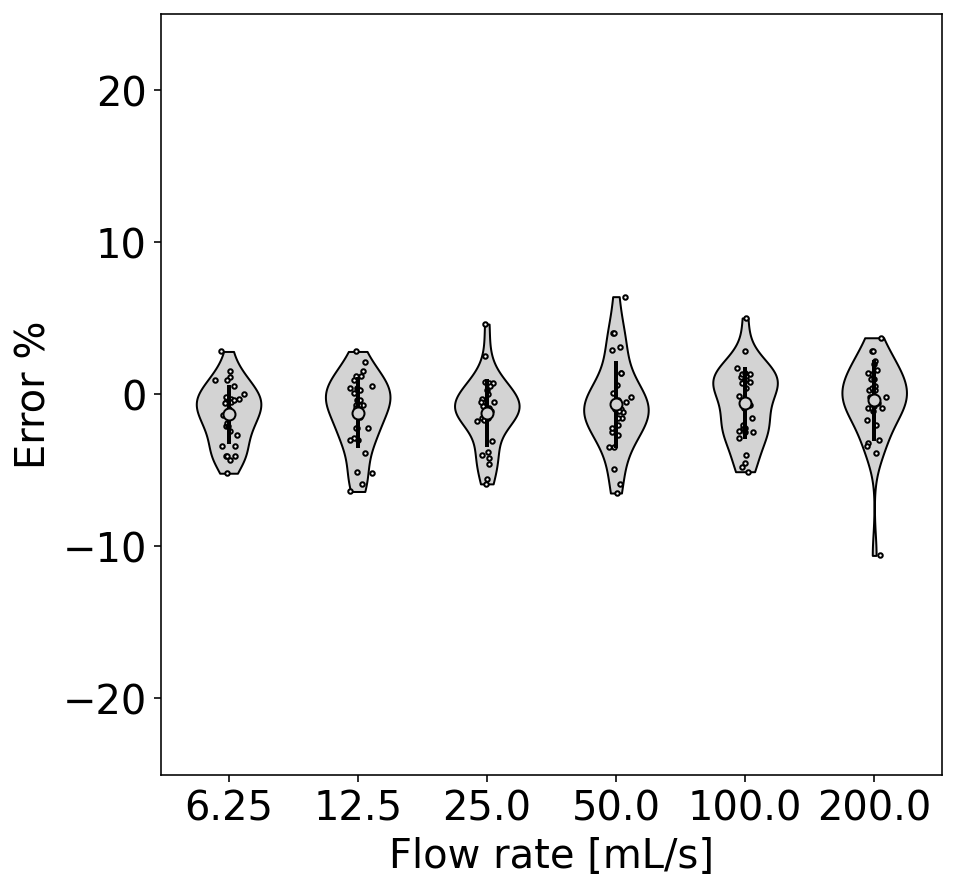

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

errors = (err/exp*100).values

violinplot(errors, ax, xticklabels=conditions)

ax.set(**{
    "xlabel": "Flow rate [mL/s]",
    "ylabel": "Error %",
    "ylim": (-25, 25)
})

fig.savefig("fraction_flowrate_error.png", bbox_inches='tight', dpi=300)

fig.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lens = obs.apply(lambda x: len(x)).values
X = np.repeat(obs.index.values, lens)
XX = sm.add_constant(X)

Y = np.concatenate(obs.values)

In [ ]:
ols = sm.OLS(Y, XX).fit()

In [ ]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.104
Date:                Tue, 26 Jan 2021   Prob (F-statistic):             0.0798
Time:                        09:57:33   Log-Likelihood:                 414.76
No. Observations:                 180   AIC:                            -825.5
Df Residuals:                     178   BIC:                            -819.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9877      0.003    391.614      0.0